###**Automated ML With Python**

####**Library**

+ **Lazypreddict**
+ **Auto_ViML**
+ **eval ML**
+ **H2O**
+ **TPOT**
+ **AutoSklearn**
+ **LigthAutoML**
+ **Hyperpot**
+ **MLBox**
+ **Speed ML**
+ **Dora**
+ **Auto_ts**
+ **Auto_tf**
+ **MLJAR**
+ **Autogluon**
+ **Pycaret**

###**Automated ML**

####**1) Auto_Sklearn**

In [ ]:
!pip install auto-sklearn
!pip install -U yellowbrick

In [ ]:
# print autosklearn version
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)
import yellowbrick
print('yellowbrick: %s' % yellowbrick.__version__)

autosklearn: 0.14.7
yellowbrick: 1.5


+ **Regression**

In [ ]:
df.columns

Index(['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus', 'Year',
       'Month', 'Week', 'Total hours', 'Date', 'Type_d'intervention',
       'Referencie'],
      dtype='object')

In [ ]:
from autosklearn.regression import AutoSklearnRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",
       'Referencie']]
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = df['Total hours']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:

# example of auto-sklearn for a classification dataset
from sklearn.metrics import accuracy_score
from autosklearn.classification import AutoSklearnClassifier

# define search
model = AutoSklearnRegressor(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
# perform the search
model.fit(X_train, y_train)
# Sprint Statistics
print(model.sprint_statistics())
# Prédire le données de validation
pred_sklearn = model.predict(X_test)
# Calculer la RMSE
rmse_sklearn=mean_squared_error(y_test, pred_sklearn)**0.5
print('RMSE: ' + str(rmse_sklearn))

auto-sklearn results:
  Dataset name: 2c08c724-2543-11ed-8045-0242ac1c0002
  Metric: r2
  Best validation score: 0.643255
  Number of target algorithm runs: 29
  Number of successful target algorithm runs: 11
  Number of crashed target algorithm runs: 3
  Number of target algorithms that exceeded the time limit: 15
  Number of target algorithms that exceeded the memory limit: 0

RMSE: 0.5345525108613502


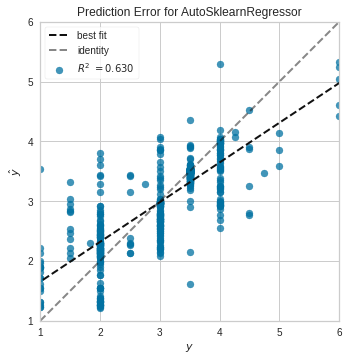

In [ ]:
# Scatter plot true and predicted values
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


+ **Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",'Total hours']]
y = df['Referencie']
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from autosklearn.classification import AutoSklearnClassifier

# Create the model
sklearn = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)#time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8
# Fit the training data
sklearn.fit(X_train, y_train)
# Sprint Statistics
print(sklearn.sprint_statistics())
# Predict the validation data
pred_sklearn = sklearn.predict(X_test)
# Compute the accuracy
print('Accuracy: ' + str(accuracy_score(y_test, pred_sklearn)))

auto-sklearn results:
  Dataset name: 7defe6c0-2543-11ed-8045-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.998138
  Number of target algorithm runs: 31
  Number of successful target algorithm runs: 25
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 6
  Number of target algorithms that exceeded the memory limit: 0

Accuracy: 0.9944649446494465


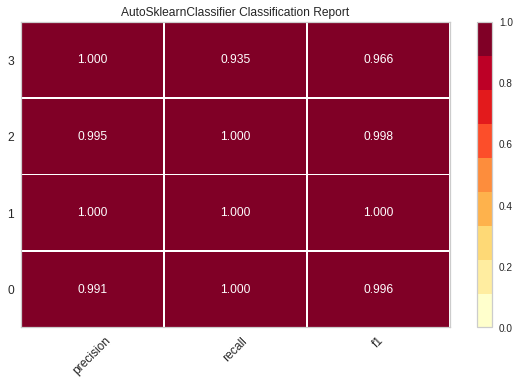

In [ ]:
from yellowbrick.classifier import ClassificationReport
#classes = ['Referencie_Caplogy', 'Referencie_Data', 'Referencie_Innovation', 'Referencie_Novatiel']
visualizer = ClassificationReport(sklearn)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

###**Outil d'optimisation de pipeline basé sur l'arborescence (TPOT)**

In [ ]:
!pip install tpot

In [ ]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


+ **Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",
       'Referencie']]
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = df['Total hours']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# example of tpot for a classification dataset
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTRegressor

# generation and population_size determine how many populations are made.
import timeit
import time

tpot = TPOTRegressor(generations=5, cv =5, population_size=5, scoring='neg_mean_absolute_error', verbosity=2, random_state=123, n_jobs=-1)
times = []
scores = []
winning_pipes = []

# run several fits
for x in range(10):
  start_time = timeit.default_timer()

tpot.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
times.append(elapsed)

winning_pipes.append(tpot.fitted_pipeline_)

scores.append(tpot.score(X_test, y_test))
tpot.export('tpot_etienne.py')


# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)
print('Winning pipelines:', winning_pipes)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.2853250342431938

Generation 2 - Current best internal CV score: -0.2853250342431938

Generation 3 - Current best internal CV score: -0.2853250342431938

Generation 4 - Current best internal CV score: -0.2853250342431938

Generation 5 - Current best internal CV score: -0.2853250342431938

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=3, min_samples_split=2, n_estimators=100)
Times: [2.052074173250003]
Scores: [-0.2935004026825982]
Winning pipelines: [Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_features=0.8,
                                       min_samples_leaf=3, random_state=123))])]


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('/content/tpot_etienne.py', on_bad_lines='skip', sep='COLUMN_SEPARATOR')
tpot_data

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,import numpy as np
0,import pandas as pd
1,from sklearn.ensemble import RandomForestRegre...
2,from sklearn.model_selection import train_test...
3,# NOTE: Make sure that the outcome column is l...
4,"features = tpot_data.drop('target', axis=1)"
5,"training_features, testing_features, training_..."
6,"train_test_split(features, tpot_data['target']..."
7,# Average CV score on the training set was: -0...
8,exported_pipeline = RandomForestRegressor(boot...
9,# Fix random state in exported estimator


+ **Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",'Total hours']]
y = df['Referencie']
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# generation and population_size determine how many populations are made.
import timeit
import time
from tpot import TPOTClassifier

# TPOT that are stopped earlier. It still gives temporary best pipeline.
# Create the model


tpot = TPOTClassifier(generations=5, cv =5, population_size=5, scoring= 'accuracy', verbosity=2, random_state=123, n_jobs=-1)
times = []
scores = []
winning_pipes = []

# run several fits
for x in range(10):
  start_time = timeit.default_timer()

tpot.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
times.append(elapsed)

winning_pipes.append(tpot.fitted_pipeline_)

scores.append(tpot.score(X_test, y_test))
tpot.export('tpot_etienne_class.py')


# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)
print('Winning pipelines:', winning_pipes)

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9963076923076922

Generation 2 - Current best internal CV score: 0.9963076923076922

Generation 3 - Current best internal CV score: 0.9963076923076922

Generation 4 - Current best internal CV score: 0.9963076923076922

Generation 5 - Current best internal CV score: 0.9963076923076922

Best pipeline: XGBClassifier(input_matrix, learning_rate=1.0, max_depth=5, min_child_weight=13, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
Times: [2.028172174583354]
Scores: [0.992619926199262]
Winning pipelines: [Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                    

###**Optimisation d'hyperparamètres asynchrones distribués (Hyperopt)**

In [ ]:
!pip install hyperopt
!pip install -U numpy

In [ ]:
# check hyperopt version
import hyperopt
print('hyperopt: %s' % hyperopt.__version__)

hyperopt: 0.2.3


In [ ]:
#!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

+ **Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import numpy.typing as npt

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",
       'Referencie']]
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = df['Total hours']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_regressor
from hpsklearn import any_preprocessing
from hyperopt import tpe
from sklearn.metrics import mean_squared_error
# Créer le modèle
hyperopt = HyperoptEstimator( regressor=any_regressor('reg'), preprocessing=any_preprocessing('pre'),
                             loss_fn=mean_squared_error, algo=tpe.suggest, max_evals=50,
                             trial_timeout=20)
# Adapter les données
hyperopt.fit(X_train, y_train)

In [ ]:
# Afficher les modèles
print(hyperopt.best_model())

{'learner': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.8932227866988688, colsample_bynode=1,
             colsample_bytree=0.5185014892651896, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.04808306169864229, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.045475659855726464, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=1, num_parallel_tree=1, predictor='auto',
             random_state=3, reg_alpha=0.7546089993311615,
             reg_lambda=2.235486969230257, ...), 'preprocs': (StandardScaler(),), 'ex_preprocs': ()}


+ **Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",'Total hours']]
y = df['Referencie']
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe
# Créer le modèle
hyperopt = HyperoptEstimator(classifier=any_classifier('cla '), preprocessing=any_preprocessing('pre'),
                             algo=tpe.suggest, max_evals=50, trial_timeout=30)
# Ajuster les données d'entraînement
hyperopt.fit(X_train, y_train)

In [ ]:
# Afficher les modèles
print(hyperopt.best_model())

{'learner': RandomForestClassifier(criterion='entropy', max_features=0.8480376861491215,
                       max_leaf_nodes=15, n_estimators=74, n_jobs=1,
                       random_state=2, verbose=False), 'preprocs': (MinMaxScaler(clip=True, feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}


###**AutoKeras**

In [ ]:
!pip install autokeras

In [ ]:
# check autokeras  version
import autokeras
print('autokeras : %s' % autokeras .__version__)

autokeras : 1.0.19


+ **Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",
       'Referencie']]
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = df['Total hours']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import autokeras
# Créer le modèle
keras = autokeras.StructuredDataRegressor(max_trials=8)
# Adapter le jeu de données d'entraînement
keras.fit(X_train, y_train, epochs=100)
# Prédire les données de validation
pred_keras = keras.predict(X_test)

Trial 8 Complete [00h 00m 33s]
val_loss: 0.4658658504486084

Best val_loss So Far: 0.3943736255168915
Total elapsed time: 00h 04m 17s
Epoch 1/100
51/51 [==============================] - 1s 4ms/step - loss: 5.5899 - mean_squared_error: 5.5899
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3307 - mean_squared_error: 1.3307
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.9586 - mean_squared_error: 0.9586
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.8624 - mean_squared_error: 0.8624
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.8108 - mean_squared_error: 0.8108
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.7738 - mean_squared_error: 0.7738
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 0.7445 - mean_squared_error: 0.7445
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7201 - mean_squared_error: 0

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
# Afficher les modèles construits
keras_export = keras.export_model()
keras_export.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 9)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                320       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

###**Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",'Total hours']]
y = df['Referencie']
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
import autokeras
# Créer le modèle
keras = autokeras.StructuredDataClassifier(max_trials=8)
# Adapter le jeu de données d'entraînement
keras.fit(X_train, y_train, epochs=100)
# Prédire les données de validation
pred_keras = keras.predict(X_test)

Trial 8 Complete [00h 00m 44s]
val_accuracy: 0.9394904375076294

Best val_accuracy So Far: 0.9426751732826233
Total elapsed time: 00h 06m 21s
Epoch 1/100
51/51 [==============================] - 1s 3ms/step - loss: 1.2267 - accuracy: 0.4785
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.9603 - accuracy: 0.6335
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.8075 - accuracy: 0.6962
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.7294
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.7478
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5984 - accuracy: 0.7669
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5646 - accuracy: 0.7743
Epoch 8/100
51/51 [==============================] - 0s 4ms/step - loss: 0.5366 - accuracy: 0.7817
Epoch 9/100
51/51 [==============================] - 0s 4ms/step -

In [ ]:
# Afficher les modèles construits
keras_export = keras.export_model()
keras_export.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 9)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                320       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

###**MLJAR**

In [ ]:
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

In [ ]:
# check supervised.automl version
#import supervised.automl
#print('supervised.automl : %s' % supervised.automl.__version__)

+ **Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",
       'Referencie']]
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = df['Total hours']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from supervised.automl import AutoML
# Créer le modèle
mljar = AutoML()
# Ajuster les données d'entraînement
mljar.fit(X_train, y_train)
# Prédire les données d'entraînement
mljar_pred = mljar.predict(X_test)

AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 2.063976 trained in 0.45 seconds
2_DecisionTree logloss 1.305432 trained in 22.89 seconds
3_Linear logloss 1.353176 trained in 21.09 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.498131 trained in 26.49 seconds
5_Default_NeuralNetwork logloss 0.913064 trained in 2.48 seconds
6_Default_RandomForest logloss 1.114742 trained in 26.35 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.495207 trained in 0.43 seconds
AutoML fit time: 110.19 seconds
AutoML best model: Ensemble


+ **Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",'Total hours']]
y = df['Referencie']
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from supervised.automl import AutoML
import matplotlib.pyplot as plt
%matplotlib inline

# Créer le modèle
mljar = AutoML()
# Ajuster les données d'entraînement
mljar.fit(X_train, y_train)
# Prédire les données d'entraînement
mljar_pred = mljar.predict(X_test)

AutoML directory: AutoML_2
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 1.185457 trained in 3.76 seconds


2_DecisionTree logloss 0.329904 trained in 11.46 seconds
3_Linear logloss 0.737371 trained in 6.18 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.001527 trained in 104.26 seconds
5_Default_NeuralNetwork logloss 0.23747 trained in 1.1 seconds
6_Default_RandomForest logloss 0.166778 trained in 10.33 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.001527 trained in 0.22 seconds
AutoML fit time: 144.17 seconds
AutoML best model: 4_Default_Xgboost


###**AutoGluon**

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon

+ **Regression**

In [ ]:
size = int(0.8*df.shape[0])
train = df[:size]
test = df[size:]
target = 'Total hours'

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
# Prepare the data
X_train_gluon = TabularDataset(train)
X_val_gluon = TabularDataset(test)
# Fit the training data
gluon = TabularPredictor(label='Total hours').fit(X_train_gluon, time_limit=120)
# Predict the training data
gluon_pred = gluon.predict(test)

In [ ]:
# Show the models
leaderboard = gluon.leaderboard(X_train_gluon)
leaderboard

                  model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       RandomForestMSE   -0.306772  -0.486022        0.126439       0.108883   1.451689                 0.126439                0.108883           1.451689            1       True          5
1         ExtraTreesMSE   -0.311490  -0.505557        0.136929       0.109012   0.939667                 0.136929                0.109012           0.939667            1       True          7
2               XGBoost   -0.324072  -0.470829        0.023416       0.011421   0.661403                 0.023416                0.011421           0.661403            1       True          9
3         LightGBMLarge   -0.324963  -0.516632        0.045505       0.011999   0.871291                 0.045505                0.011999           0.871291            1       True         11
4              LightGBM   -0.325836  -0.

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestMSE,-0.306772,-0.486022,0.126439,0.108883,1.451689,0.126439,0.108883,1.451689,1,True,5
1,ExtraTreesMSE,-0.311490,-0.505557,0.136929,0.109012,0.939667,0.136929,0.109012,0.939667,1,True,7
2,XGBoost,-0.324072,-0.470829,0.023416,0.011421,0.661403,0.023416,0.011421,0.661403,1,True,9
3,LightGBMLarge,-0.324963,-0.516632,0.045505,0.011999,0.871291,0.045505,0.011999,0.871291,1,True,11
4,LightGBM,-0.325836,-0.482044,0.045920,0.015157,0.541278,0.045920,0.015157,0.541278,1,True,4
5,LightGBMXT,-0.331427,-0.472857,0.161659,0.028496,1.692505,0.161659,0.028496,1.692505,1,True,3
6,WeightedEnsemble_L2,-0.333598,-0.459946,0.303406,0.098486,17.954625,0.005170,0.000665,0.456880,2,True,12
7,NeuralNetFastAI,-0.366079,-0.477590,0.058147,0.027021,3.954413,0.058147,0.027021,3.954413,1,True,8
8,CatBoost,-0.385988,-0.495250,0.019545,0.013731,6.567852,0.019545,0.013731,6.567852,1,True,6
9,NeuralNetTorch,-0.387452,-0.490316,0.055014,0.030884,11.189424,0.055014,0.030884,11.189424,1,True,10


+ **Classification**

In [ ]:
size = int(0.8*df.shape[0])
train = df[:size]
test = df[size:]
target = 'Referencie'

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

# Prepare the data
X_train_gluon = TabularDataset(train)
X_val_gluon = TabularDataset(test)
# Fit the training data
gluon = TabularPredictor(label='Referencie').fit(X_train_gluon, time_limit=120)
# Predict the training data
gluon_pred = gluon.predict(test)

In [ ]:
# Show the models
leaderboard = gluon.leaderboard(X_train_gluon)
leaderboard

                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost    1.000000   1.000000        0.011095       0.010775  6.273336                 0.011095                0.010775           6.273336            1       True          8
1               XGBoost    1.000000   1.000000        0.017819       0.012383  0.601206                 0.017819                0.012383           0.601206            1       True         11
2   WeightedEnsemble_L2    1.000000   1.000000        0.021122       0.012953  1.024708                 0.003303                0.000569           0.423502            2       True         14
3              LightGBM    1.000000   1.000000        0.023711       0.009120  0.841034                 0.023711                0.009120           0.841034            1       True          5
4        NeuralNetTorch    1.000000   1.00000

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,1.000000,1.000000,0.011095,0.010775,6.273336,0.011095,0.010775,6.273336,1,True,8
1,XGBoost,1.000000,1.000000,0.017819,0.012383,0.601206,0.017819,0.012383,0.601206,1,True,11
2,WeightedEnsemble_L2,1.000000,1.000000,0.021122,0.012953,1.024708,0.003303,0.000569,0.423502,2,True,14
3,LightGBM,1.000000,1.000000,0.023711,0.009120,0.841034,0.023711,0.009120,0.841034,1,True,5
4,NeuralNetTorch,1.000000,1.000000,0.055804,0.025610,5.563064,0.055804,0.025610,5.563064,1,True,12
5,NeuralNetFastAI,1.000000,1.000000,0.056582,0.025475,2.482813,0.056582,0.025475,2.482813,1,True,3
6,LightGBMXT,1.000000,1.000000,0.078033,0.019302,1.064255,0.078033,0.019302,1.064255,1,True,4
7,LightGBMLarge,0.999423,0.997118,0.040307,0.013162,1.873449,0.040307,0.013162,1.873449,1,True,13
8,RandomForestEntr,0.996540,0.982709,0.232757,0.207356,1.059471,0.232757,0.207356,1.059471,1,True,7
9,RandomForestGini,0.995963,0.979827,0.224286,0.209519,1.048139,0.224286,0.209519,1.048139,1,True,6


###**H2O**

+ **Regression**

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128112 sha256=66c1ea6bfd33b053fa9f56c7a0f4a75d6e02220d1dd2f03562eca559f0aad8c5
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1riblz42
  JVM stdout: /tmp/tmp1riblz42/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1riblz42/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_unknownUser_gwvpju
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data = h2o.import_file('/content/data_cap.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.types

{'C1': 'int',
 'Intervenants': 'enum',
 'Intervenants réel': 'enum',
 'Matière': 'enum',
 'Campus': 'enum',
 'Year': 'int',
 'Month': 'int',
 'Week': 'int',
 'Total hours': 'real',
 'Date': 'int',
 "Type d'intervention": 'enum',
 'Referencie': 'enum'}

In [ ]:
data.describe()

Rows:2732
Cols:12




,C1,Intervenants,Intervenants réel,Matière,Campus,Year,Month,Week,Total hours,Date,Type d'intervention,Referencie
type,int,enum,enum,enum,enum,int,int,int,real,int,enum,enum
mins,0.0,,,,,2022.0,1.0,1.0,1.0,1.0,,
mean,1401.9718155197656,,,,,2022.0,3.296852122986823,12.275256222547585,2.9000427037579306,15.060029282576863,,
maxs,2790.0,,,,,2022.0,7.0,28.0,9.5,31.0,,
sigma,803.9400956198289,,,,,0.0,1.5984994941599506,6.812308397680326,0.9250079298327726,8.498177701092587,,
zeros,1,,,,,0,0,0,0,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,Intervenant_1,Intervenant_1,cours_b2_économie générale,IA_School_Paris,2022.0,2.0,5.0,3.5,3.0,Cours_fr,Innovation
1,1.0,Intervenant_5,Intervenant_5,ctp_langages et compilation,EFREI,2022.0,2.0,5.0,3.0,1.0,CTP_fr,Caplogy
2,2.0,Intervenant_5,Intervenant_5,prj_l1_projet transverse,EFREI,2022.0,2.0,5.0,2.0,1.0,PRJ_fr,Caplogy


In [ ]:
train,test,valid = data.split_frame(ratios=[.7, .15])

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["DeepLearning"], verbosity="info", nfolds=0)
aml

In [ ]:
y = "Total hours"
x = data.columns
x.remove(y)
x.remove("C1")
x.remove("Year")

In [ ]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
23:16:55.605: Project: AutoML_1_20220830_231655
23:16:55.607: Cross-validation disabled by user: no fold column nor nfolds > 1.
23:16:55.608: Setting stopping tolerance adaptively based on the training frame: 0.022639736366332933
23:16:55.608: Build control seed: 10
23:16:55.610: training frame: Frame key: AutoML_1_20220830_231655_training_py_2_sid_956a    cols: 12    rows: 1951  chunks: 8    size: 140030  checksum: 5278558868561461576
23:16:55.612: validation frame: Frame key: py_4_sid_956a    cols: 12    rows: 389  chunks: 8    size: 118131  checksum: -1868069032159411998
23:16:55.613: leaderboard frame: Frame key: py_4_sid_956a    cols: 12    rows: 389  chunks: 8    size: 118131  checksum: -1868069032159411998
23:16:55.614: blending frame: NULL
23:16:55.614: response column: Total hours
23:16:55.618: fold column: null
23:16:55.618: weights column: null
23:16:55.641: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g

,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.10056912410999329
RMSE: 0.3171263535406562
MAE: 0.19899598346008268
RMSLE: 0.09517139051833103
Mean Residual Deviance: 0.10056912410999329

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.2973215411105324
RMSE: 0.5452719881953706
MAE: 0.3166885268718847
RMSLE: 0.1440919467585767
Mean Residual Deviance: 0.2973215411105324

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2022-08-30 23:17:00,0.004 sec,0.0,2.574417,2.408380,6.627623,2.595168,2.393316,6.734897
1,,2022-08-30 23:17:00,0.080 sec,5.0,0.634733,0.523237,0.402886,0.763196,0.572841,0.582468
2,,2022-08-30 23:17:00,0.145 sec,10.0,0.414604,0.294962,0.171897,0.590894,0.372980,0.349155
3,,2022-08-30 23:17:00,0.194 sec,15.0,0.380860,0.249224,0.145054,0.571989,0.337097,0.327171
4,,2022-08-30 23:17:00,0.251 sec,20.0,0.362882,0.232628,0.131684,0.561441,0.327945,0.315216
5,,2022-08-30 23:17:00,0.297 sec,25.0,0.351255,0.226142,0.123380,0.551147,0.324274,0.303763
6,,2022-08-30 23:17:01,0.364 sec,30.0,0.340919,0.218715,0.116226,0.553424,0.321383,0.306278
7,,2022-08-30 23:17:01,0.425 sec,35.0,0.332660,0.210620,0.110663,0.551865,0.316936,0.304555
8,,2022-08-30 23:17:01,0.491 sec,40.0,0.325751,0.205976,0.106114,0.548866,0.319146,0.301254
9,,2022-08-30 23:17:01,0.574 sec,45.0,0.321896,0.201769,0.103617,0.545880,0.318695,0.297985



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Campus.ECE,479.763092,1.000000,0.251166
1,Type d'intervention.BTS_fr,127.131439,0.264988,0.066556
2,Week,115.682030,0.241123,0.060562
3,Type d'intervention.PR_fr,114.849495,0.239388,0.060126
4,Type d'intervention.Seance_fr,94.999405,0.198013,0.049734
5,Date,89.230873,0.185989,0.046714
6,Referencie.Caplogy,74.185089,0.154629,0.038838
7,Campus.ESCOM,65.607704,0.136750,0.034347
8,Campus.EFREI,47.773796,0.099578,0.025011
9,Month,33.118668,0.069031,0.017338



See the whole table with table.as_data_frame()


In [ ]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_2_AutoML_1_20220830_231655,0.545272,0.297322,0.316689,0.144092,0.297322
GBM_1_AutoML_1_20220830_231655,0.557062,0.310318,0.256917,0.140952,0.310318
GBM_4_AutoML_1_20220830_231655,0.561281,0.315036,0.256586,0.144046,0.315036
DRF_1_AutoML_1_20220830_231655,0.562645,0.31657,0.264473,0.148157,0.31657
GBM_2_AutoML_1_20220830_231655,0.568954,0.323709,0.262179,0.14709,0.323709
GBM_3_AutoML_1_20220830_231655,0.570632,0.325621,0.264063,0.148264,0.325621
XGBoost_1_AutoML_1_20220830_231655,0.582466,0.339267,0.361166,0.153067,0.339267
XGBoost_3_AutoML_1_20220830_231655,0.58356,0.340542,0.332587,0.147147,0.340542
GLM_1_AutoML_1_20220830_231655,0.589356,0.34734,0.335932,0.147683,0.34734
XRT_1_AutoML_1_20220830_231655,0.593109,0.351779,0.363921,0.152323,0.351779


In [ ]:
pred=aml.leader.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
pred.head()

predict
2.96672
3.22143
2.10413
3.46977
3.50364
3.48289
3.51613
3.5644
3.46431
1.89852


In [ ]:
aml.leader.model_performance(test)


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.13766680808942292
RMSE: 0.37103478016140606
MAE: 0.2266653992083608
RMSLE: 0.11661877817821413
Mean Residual Deviance: 0.13766680808942292


+ **Classification**

In [ ]:
data = h2o.import_file('/content/data_cap.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train,test,valid = data.split_frame(ratios=[.7, .15])

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["DeepLearning"], verbosity="info", nfolds=0)
aml

In [ ]:
y = "Referencie"
x = data.columns
x.remove(y)
x.remove("C1")
x.remove("Year")

In [ ]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
23:18:44.356: Project: AutoML_2_20220830_231844
23:18:44.356: Cross-validation disabled by user: no fold column nor nfolds > 1.
23:18:44.356: Setting stopping tolerance adaptively based on the training frame: 0.022774375933713845
23:18:44.356: Build control seed: 10
23:18:44.356: training frame: Frame key: AutoML_2_20220830_231844_training_py_10_sid_956a    cols: 12    rows: 1928  chunks: 8    size: 139739  checksum: 5101828595671170576
23:18:44.357: validation frame: Frame key: py_12_sid_956a    cols: 12    rows: 388  chunks: 8    size: 118060  checksum: 7500428179897548726
23:18:44.357: leaderboard frame: Frame key: py_12_sid_956a    cols: 12    rows: 388  chunks: 8    size: 118060  checksum: 7500428179897548726
23:18:44.362: blending frame: NULL
23:18:44.363: response column: Referencie
23:18:44.363: fold column: null
23:18:44.363: weights column: null
23:18:44.363: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,140.0,25158.0,1.0,8.0,2.414286,2.0,16.0,4.564286




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.0009487397393167877
RMSE: 0.03080161910219636
LogLoss: 0.007949936247411454
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Caplogy,Data,Innovation,Novatiel,Error,Rate
0,879.0,0.0,0.0,0.0,0.0,0 / 879
1,0.0,184.0,0.0,0.0,0.0,0 / 184
2,0.0,0.0,692.0,0.0,0.0,0 / 692
3,0.0,0.0,0.0,173.0,0.0,0 / 173
4,879.0,184.0,692.0,173.0,0.0,"0 / 1,928"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.0006812436046857002
RMSE: 0.026100643759986077
LogLoss: 0.008378612550599645
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Caplogy,Data,Innovation,Novatiel,Error,Rate
0,170.0,0.0,0.0,0.0,0.0,0 / 170
1,0.0,39.0,0.0,0.0,0.0,0 / 39
2,0.0,0.0,141.0,0.0,0.0,0 / 141
3,0.0,0.0,0.0,38.0,0.0,0 / 38
4,170.0,39.0,141.0,38.0,0.0,0 / 388



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-08-30 23:19:01,0.003 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-08-30 23:19:01,0.078 sec,5.0,0.030996,0.004955,0.001147,NaN,NaN,0.019940,0.002208,0.0,NaN,NaN
2,,2022-08-30 23:19:01,0.145 sec,10.0,0.021476,0.002160,0.000523,NaN,NaN,0.024483,0.003110,0.0,NaN,NaN
3,,2022-08-30 23:19:01,0.214 sec,15.0,0.022367,0.002818,0.000000,NaN,NaN,0.023031,0.004337,0.0,NaN,NaN
4,,2022-08-30 23:19:01,0.290 sec,20.0,0.026734,0.004561,0.000000,NaN,NaN,0.021829,0.005329,0.0,NaN,NaN
5,,2022-08-30 23:19:01,0.350 sec,25.0,0.027387,0.005398,0.000000,NaN,NaN,0.022086,0.006088,0.0,NaN,NaN
6,,2022-08-30 23:19:01,0.462 sec,30.0,0.031514,0.007574,0.000000,NaN,NaN,0.026438,0.008393,0.0,NaN,NaN
7,,2022-08-30 23:19:01,0.522 sec,35.0,0.030802,0.007950,0.000000,NaN,NaN,0.026101,0.008379,0.0,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Campus,21082.980469,1.000000,0.521925
1,Matière,11966.459961,0.567589,0.296239
2,Type d'intervention,3294.236816,0.156251,0.081551
3,Intervenants réel,1634.174194,0.077512,0.040455
4,Total hours,1408.695068,0.066817,0.034873
5,Intervenants,965.464783,0.045794,0.023901
6,Week,30.967329,0.001469,0.000767
7,Date,7.066644,0.000335,0.000175
8,Month,4.609841,0.000219,0.000114


In [ ]:
lb = aml.leaderboard
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
DRF_1_AutoML_2_20220830_231844,0,0.00837861,0.0261006,0.000681244
GBM_3_AutoML_2_20220830_231844,0,1.00984e-09,1.32887e-08,1.76589e-16
GBM_4_AutoML_2_20220830_231844,0,9.71316e-09,1.3919e-07,1.93738e-14
GBM_5_AutoML_2_20220830_231844,0,6.7365e-10,9.18849e-09,8.44284e-17
GBM_1_AutoML_2_20220830_231844,0,4.26373e-08,5.63285e-07,3.1729e-13
GBM_2_AutoML_2_20220830_231844,0,2.67966e-09,4.74999e-08,2.25624e-15
XGBoost_3_AutoML_2_20220830_231844,0.00147059,0.0200258,0.0572025,0.00327212
XGBoost_2_AutoML_2_20220830_231844,0.00935143,0.045364,0.0987329,0.00974818
XGBoost_1_AutoML_2_20220830_231844,0.0188716,0.0941999,0.152514,0.0232604
XRT_1_AutoML_2_20220830_231844,0.303001,0.585691,0.453918,0.206042


In [ ]:
pred=aml.leader.predict(test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
pred.head()

predict,Caplogy,Data,Innovation,Novatiel
Caplogy,0.999908,2.1775e-05,7.00788e-05,0
Caplogy,0.999908,2.1775e-05,7.00788e-05,0
Caplogy,0.999908,2.1775e-05,7.00788e-05,0
Caplogy,0.999908,2.1775e-05,7.00788e-05,0
Caplogy,0.999908,2.1775e-05,7.00788e-05,0
Caplogy,0.999908,2.1775e-05,7.00788e-05,0
Caplogy,0.999908,2.1775e-05,7.00788e-05,0
Innovation,0,0,1,0
Innovation,0,0,1,0
Innovation,0.029409,0.176476,0.794115,0


In [ ]:
aml.leader.model_performance(test)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.0011849193119064993
RMSE: 0.034422656955942536
LogLoss: 0.011231391090690759
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Caplogy,Data,Innovation,Novatiel,Error,Rate
0,186.0,0.0,0.0,0.0,0.0,0 / 186
1,0.0,35.0,0.0,0.0,0.0,0 / 35
2,0.0,0.0,156.0,0.0,0.0,0 / 156
3,0.0,0.0,0.0,39.0,0.0,0 / 39
4,186.0,35.0,156.0,39.0,0.0,0 / 416



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0


###**Auto_ViML**

In [ ]:
!pip install autoviml
#!python -m pip uninstall matplotlib
!python -m pip install -U matplotlib

+ **Regression**

In [ ]:
import nltk
%matplotlib inline
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
size = int(0.9*df.shape[0])
train = df[:size]
test = df[size:]
target = 'Total hours'

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1951, 11)
    Training Set Memory Usage = 0.16 MB
Test Set Shape = (217, 11)
    Test Set Memory Usage = 0.02 MB
Single_Label Target: ['Total hours']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Bo

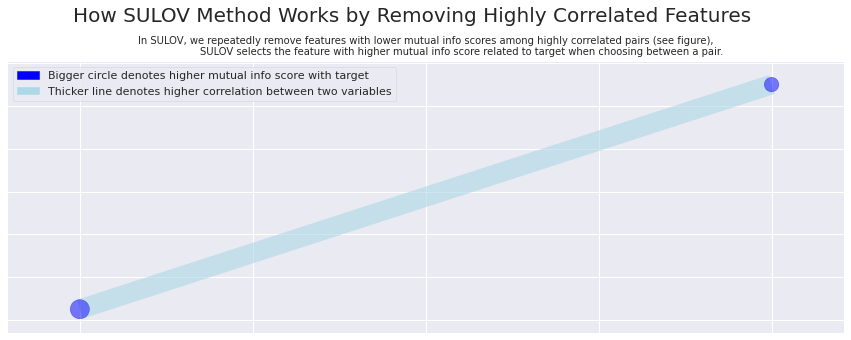

Splitting selected features into float and categorical (integer) variables:
    (2) float variables ...
    (6) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 8 
    Finding Important Features using Boosted Trees algorithm...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 8 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  1560 , CV rows =  391
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Skipping MinMax scaling since perform_scaling flag is set to F

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016661
0:	learn: 0.8780462	test: 0.9253394	best: 0.9253394 (0)	total: 47.6ms	remaining: 5m 32s
500:	learn: 0.4461443	test: 0.5122626	best: 0.5122626 (500)	total: 1.07s	remaining: 13.9s
1000:	learn: 0.3827057	test: 0.4819224	best: 0.4819224 (1000)	total: 2.12s	remaining: 12.7s
1500:	learn: 0.3520860	test: 0.4729143	best: 0.4728032 (1498)	total: 3.25s	remaining: 11.9s
2000:	learn: 0.3342581	test: 0.4690141	best: 0.4690069 (1996)	total: 4.07s	remaining: 10.2s
2500:	learn: 0.3200404	test: 0.4688980	best: 0.4683644 (2171)	total: 5.25s	remaining: 9.44s
3000:	learn: 0.3101162	test: 0.4705618	best: 0.4683644 (2171)	total: 6.18s	remaining: 8.24s
3500:	learn: 0.3024220	test: 0.4733562	best: 0.4683644 (2171)	total: 6.87s	remaining: 6.87s
4000:	learn: 0.2961659	test: 0.4757572	best: 0.4683644 (2171)	total: 7.61s	remaining: 5.71s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 0.4683644473
bestIteration = 2171

Shrink model to first 2172 iterations.
    Ac

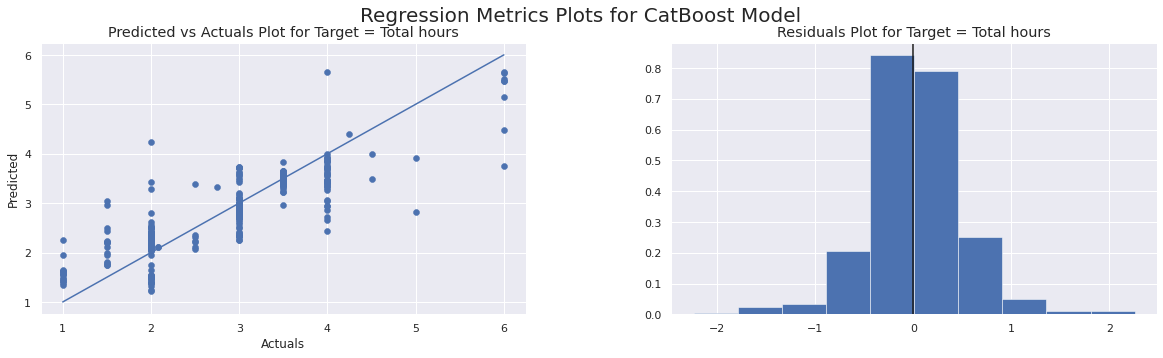

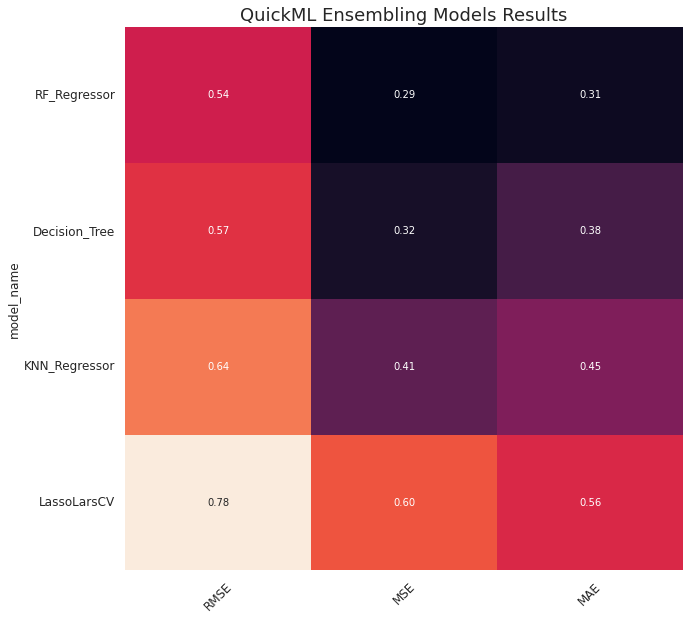

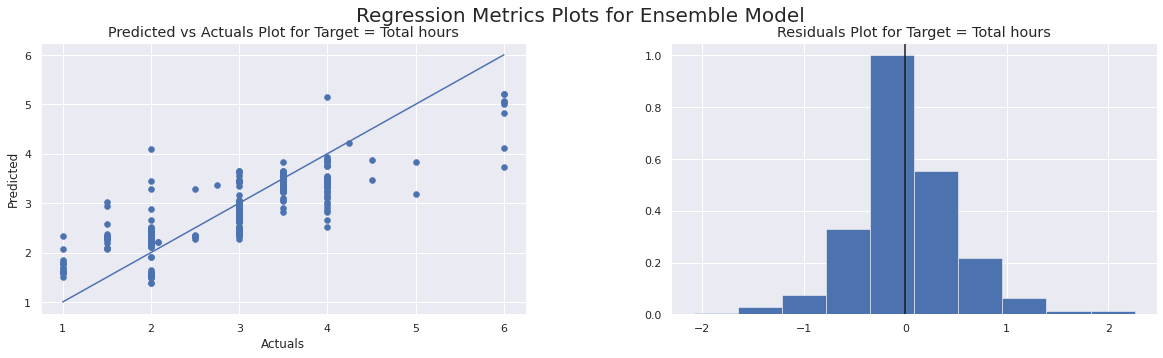

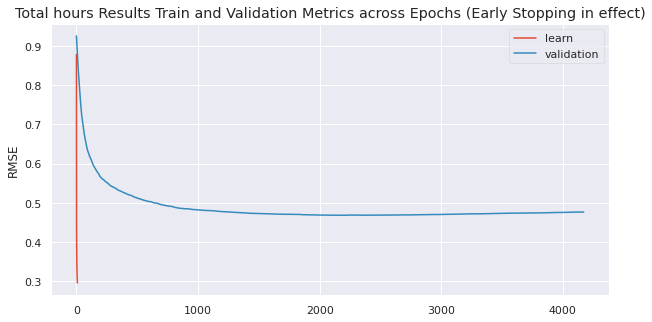

    Time taken for this Target (in seconds) = 22
    Binning_Flag set to False or there are no float vars in data set to be binned
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 6
No MinMax scaling performed since scaling flag is set to false
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
0:	learn: 0.8884884	total: 1.25ms	remaining: 2.72s
500:	learn: 0.4482528	total: 931ms	remaining: 3.1s
1000:	learn: 0.3914659	total: 1.69s	remaining: 1.98s
1500:	learn: 0.3642615	total: 2.47s	remaining: 1.1s
2000:	learn: 0.3445734	total: 3.8s	remaining: 323ms
2170:	learn: 0.3396609	total: 4.31s	remaining: 0us
     Actual Training time taken in seconds = 5
Training of models com

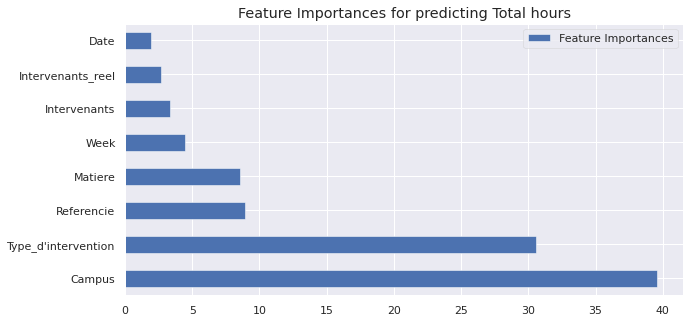

In [ ]:
from autoviml.Auto_ViML import Auto_ViML
import matplotlib.pyplot as plt
%matplotlib inline

# Create the model
viml, features, train_v, test_v = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

+ **Classification**

In [ ]:
size = int(0.8*df.shape[0])
train = df[:size]
test = df[size:]
target = 'Referencie'

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1734, 11)
    Training Set Memory Usage = 0.15 MB
Test Set Shape = (434, 11)
    Test Set Memory Usage = 0.04 MB
Single_Label Target: ['Referencie']

################ Multi_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
       Class  -> Counts -> Percent
     Caplogy:     681  ->   39.3%
        Data:     216  ->   12.5%
  Innovation:     656  ->   37.8%
    Novatiel:     181  ->   10.4%
CAUTION: In Multi-Class Boosting (2+ classes), TRAINING WILL TAKE A LOT OF TIME!
String or Multi Class target: Referencie transformed as follows: {'Caplogy': 0, 'Innovation': 1, 'Data': 2, 'Novatiel': 3}
Alert! Rare Class is not 1 but 3 in this data set
#

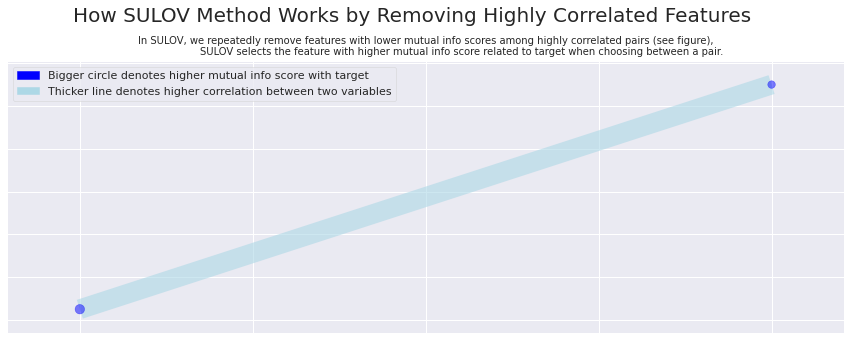

Splitting selected features into float and categorical (integer) variables:
    (3) float variables ...
    (5) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 8 
    Finding Important Features using Boosted Trees algorithm...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 8 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  1387 , CV rows =  347
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Skipping MinMax scaling since perform_scaling flag is set to F

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.051682
0:	test: 0.9418726	best: 0.9418726 (0)	total: 3.59ms	remaining: 25.1s


500:	test: 1.0000000	best: 1.0000000 (138)	total: 902ms	remaining: 11.7s
1000:	test: 1.0000000	best: 1.0000000 (138)	total: 1.79s	remaining: 10.7s
1500:	test: 1.0000000	best: 1.0000000 (138)	total: 2.7s	remaining: 9.9s
2000:	test: 1.0000000	best: 1.0000000 (138)	total: 4.38s	remaining: 10.9s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 1
bestIteration = 138

Shrink model to first 139 iterations.
    Actual training time (in seconds): 5
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation  balanced_accuracy = 100.0%
    CatBoost Best Parameters for Model: Iterations = 138, learning_rate = 0.05
########################################################
CatBoost Model Prediction Results on Held Out CV Data Set:
Multi Class Model Metrics Report
#####################################################
    Accuracy          = 98.6%
    Balanced Accuracy (average recall) = 97.2%
    Average Precision (macro) = 99.1%
    Precisions by

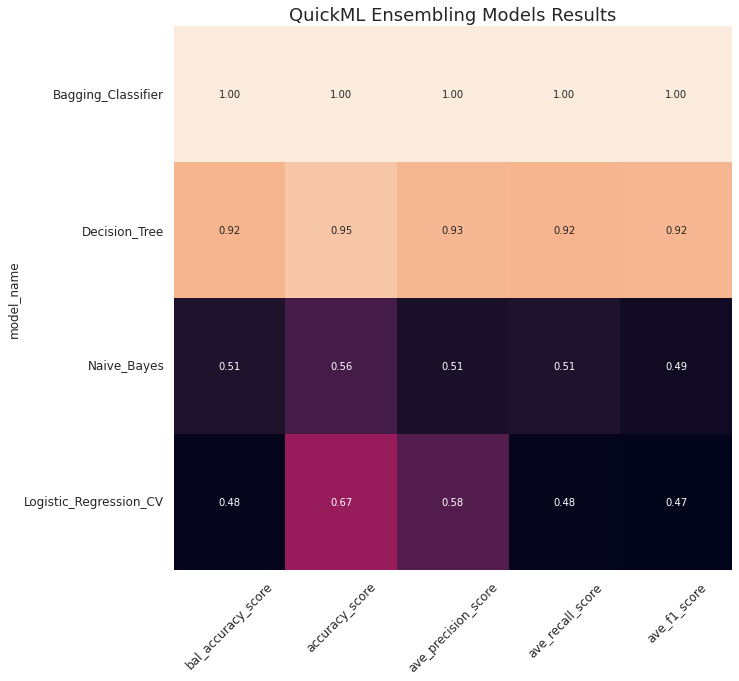

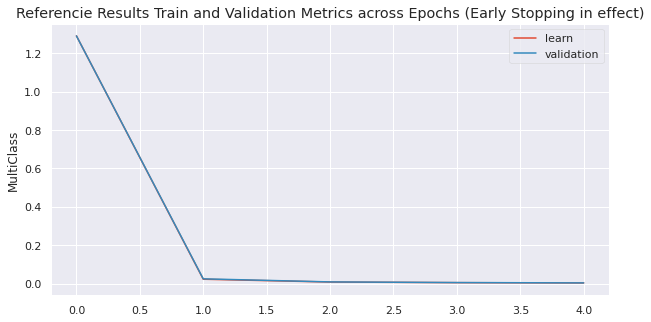

    Time taken for this Target (in seconds) = 13
    Binning_Flag set to False or there are no float vars in data set to be binned
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 5
No MinMax scaling performed since scaling flag is set to false
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
0:	total: 22.5ms	remaining: 3.08s
137:	total: 1.54s	remaining: 0us
     Actual Training time taken in seconds = 2
Training of models completed. Now starting predictions on test data...
    Calculating weighted average ensemble of 5 classifiers
########################################################
Completed Ensemble predictions on held out data
    Plotting Feature Importanc

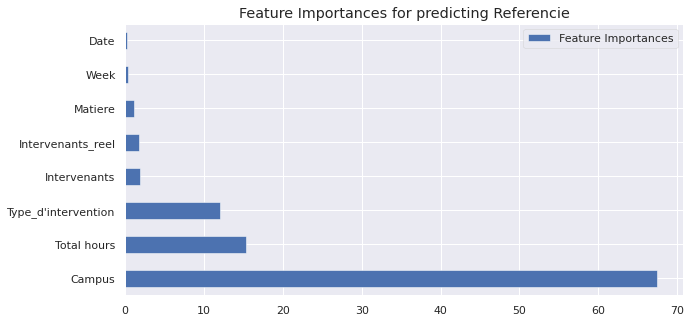

In [ ]:
from autoviml.Auto_ViML import Auto_ViML
# Create the model
viml, features, train_v, test_v = Auto_ViML(train, target, test,
                            scoring_parameter='balanced_accuracy', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
viml

###**LightAutoML**

In [ ]:
!pip install -U lightautoml
#!pip install openpyxl

+ **Regression**

In [ ]:
size = int(0.8*df.shape[0])
train = df[:size]
test = df[size:]
target = 'Total hours'

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [ ]:
light = TabularAutoML(
    task=Task('reg',), timeout=60*3, cpu_limit=4)

train_pred = light.fit_predict(
    train,
    roles = {'target': 'Total hours', 'drop':['Year']}
)
test_pred = light.predict(test)

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 180.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (1734, 11)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 175.66 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [16, 17, 18, 19], 'embed_sizes': array([22, 23, 25, 25], dtype=int32), 'data_size': 20}

+ **Classification**

In [ ]:
size = int(0.8*df.shape[0])
train = df[:size]
test = df[size:]
target = 'Referencie'

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [ ]:
light = TabularAutoML(
    task=Task('multiclass',), timeout=60*3, cpu_limit=4)

train_pred = light.fit_predict(
    train,
    roles = {'target': 'Referencie', 'drop':['Year']}
)

# Predict the validation data
pred_light = light.predict(test)

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: multiclass

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 180.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (1734, 11)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 179.60 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'embed_sizes'

In [ ]:
# Convert the prediction result into dataframe
pred_light2 = pred_light.data
pred_light2 = pd.DataFrame(pred_light2, columns=['4','2','3','1'])
pred_light2 = pred_light2[['1','2','3','4']]
pred_light2['Pred'] = pred_light2.idxmax(axis=1)
pred_light2['Pred'] = pred_light2['Pred'].astype(int)
pred_light2.head()

,1,2,3,4,Pred
0,0.000075,0.000129,0.999723,0.000073,3
1,0.000240,0.998565,0.000536,0.000658,2
2,0.000232,0.999400,0.000036,0.000332,2
3,0.000266,0.999417,0.000035,0.000283,2
4,0.000109,0.998455,0.000572,0.000864,2


###**Install LazyPredict**

In [ ]:
!pip install lazypredict

+ **Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",
       'Referencie']]
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = df['Total hours']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

from google.colab import data_table
data_table.enable_dataframe_formatter()
models

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 42/42 [00:08<00:00,  5.25it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.67,0.68,0.50,0.10
HistGradientBoostingRegressor,0.67,0.67,0.50,0.57
RandomForestRegressor,0.64,0.65,0.52,0.58
BaggingRegressor,0.63,0.64,0.53,0.08
GradientBoostingRegressor,0.62,0.62,0.54,0.23
XGBRegressor,0.58,0.59,0.56,0.32
ExtraTreesRegressor,0.58,0.58,0.57,0.36
NuSVR,0.47,0.48,0.63,0.32
SVR,0.47,0.48,0.64,0.23


+ **Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X = df[['Intervenants', 'Intervenants_reel', 'Matiere', 'Campus',
       'Month', 'Week', 'Date', "Type_d'intervention",'Total hours']]
y = df['Referencie']
# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
from google.colab import data_table
data_table.enable_dataframe_formatter()
models

100%|██████████| 29/29 [00:09<00:00,  3.22it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,1.00,1.00,None,1.00,0.18
XGBClassifier,1.00,1.00,None,1.00,0.63
DecisionTreeClassifier,1.00,1.00,None,1.00,0.03
LGBMClassifier,1.00,0.99,None,1.00,0.36
RandomForestClassifier,0.99,0.98,None,0.99,2.60
ExtraTreesClassifier,0.99,0.98,None,0.99,0.46
ExtraTreeClassifier,0.95,0.93,None,0.95,0.03
LabelSpreading,0.88,0.83,None,0.88,0.49
LabelPropagation,0.88,0.83,None,0.88,0.33


###**EvalML**

In [ ]:
!pip install -U evalml

+ **Regression**

In [ ]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [ ]:
from evalml.preprocessing import load_data
X, y = load_data("/content/data_cap.csv", index=None,target="Total hours")

             Number of Features
Categorical                   6
Numeric                       5

Number of training examples: 2732
Targets
3.50    35.76%
2.00    23.54%
3.00    18.63%
4.00     8.93%
1.00     5.71%
1.50     3.92%
6.00     0.92%
2.50     0.92%
5.00     0.40%
4.50     0.37%
4.25     0.22%
2.08     0.18%
4.75     0.11%
3.25     0.11%
2.75     0.07%
1.83     0.07%
2.33     0.04%
9.50     0.04%
2.83     0.04%
1.67     0.04%
Name: Total hours, dtype: object


In [ ]:
from evalml import AutoMLSearch
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X,y,problem_type='regression')

In [ ]:
X.ww

,Physical Type,Logical Type,Semantic Tag(s)
Column,,,
Unnamed: 0,int64,Integer,['numeric']
Intervenants,category,Categorical,['category']
Intervenants réel,category,Categorical,['category']
Matière,string,Unknown,[]
Campus,category,Categorical,['category']
Year,float64,Double,['numeric']
Month,float64,Double,['numeric']
Week,float64,Double,['numeric']
Date,float64,Double,['numeric']


In [ ]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

In [ ]:
from evalml import AutoMLSearch
automl = AutoMLSearch(
    X_train=X,
    y_train=y,
    problem_type="regression",
    max_batches=1,
    optimize_thresholds=True
)

automl.search()

ERROR:prophet.plot:Importing matplotlib failed. Plotting will not work.
ERROR:evalml.automl.callbacks:			Fold 0: Exception during automl search: MedianAE encountered TypeError with message (median_absolute_error() got an unexpected keyword argument 'sample_weight'):

  File "/usr/local/lib/python3.7/dist-packages/evalml/pipelines/pipeline_base.py", line 369, in _score_all_objectives
    objective,

  File "/usr/local/lib/python3.7/dist-packages/evalml/pipelines/pipeline_base.py", line 336, in _score
    return objective.score(y, predictions, X)

  File "/usr/local/lib/python3.7/dist-packages/evalml/objectives/objective_base.py", line 100, in score
    y_true, y_predicted, X=X, sample_weight=sample_weight

  File "/usr/local/lib/python3.7/dist-packages/evalml/objectives/standard_metrics.py", line 856, in objective_function
    y_true, y_predicted, sample_weight=sample_weight

  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py", line 73, in inner_f
    warnings.wa

AutoMLSearchException: ignored

In [ ]:
automl.search()

+ **Classification**

In [ ]:
from evalml.preprocessing import load_data
X, y = load_data("/content/data_cap.csv", index=None,target="Referencie")

             Number of Features
Categorical                   5
Numeric                       6

Number of training examples: 2732
Targets
Caplogy       45.20%
Innovation    36.20%
Data           9.44%
Novatiel       9.15%
Name: Referencie, dtype: object


In [ ]:
from evalml import AutoMLSearch
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X,y,problem_type='multiclass')

In [ ]:
from evalml import AutoMLSearch
automl = AutoMLSearch(
    X_train=X,
    y_train=y,
    problem_type="multiclass",
    max_batches=1,
    optimize_thresholds=True
)

automl.search()

ERROR:evalml.automl.callbacks:			Fold 0: Exception during automl search: 'TableSchema' object has no attribute '_get_subset_schema'
ERROR:evalml.automl.callbacks:			Fold 0: Parameters:
	{'Label Encoder': {'positive_label': None}, 'Drop Columns Transformer': {'columns': ['Matière']}, 'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'One Hot Encoder': {'top_n': 10, 'features_to_encode': None, 'categories': None, 'drop': 'if_binary', 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'Oversampler': {'sampling_ratio': 0.25, 'k_neighbors_default': 5, 'n_jobs': -1, 'sampling_ratio_dict': None}, 'Elastic Net Classifier': {'penalty': 'elasticnet', 'C': 1.0, 'l1_ratio': 0.15, 'n_jobs': -1, 'multi_class': 'auto', 'solver': 'saga'}}
ERROR:evalml.automl.callbacks:			Fold 0: Traceback:
  File "/usr/local/lib/python3.7/dist-packages/evalml/automl/engine/engine_base.py", line 224, in train_

AutoMLSearchException: ignored

###**MLbox**

+ **Regression**

In [ ]:
!pip install mlbox

In [ ]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [ ]:
size = int(0.8*df.shape[0])
train_data = df[:size].to_csv("train_data.csv")
test_data = df[size:].to_csv("test_data.csv")

In [ ]:
train_path = "/content/train_data.csv"
test_path = "/content/test_data.csv"
paths = [train_path, test_path]
target_name = "Total hours"

In [ ]:
rd = Reader(sep = ',')
df_1 = rd.train_test_split(paths, target_name)


reading csv : train_data.csv ...
cleaning data ...
CPU time: 11.635434627532959 seconds

reading csv : test_data.csv ...
cleaning data ...
CPU time: 0.31051111221313477 seconds

You have no test dataset !

> Number of common features : 10

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 6
> Number of numerical features: 3
> Number of training samples : 2096
> Number of test samples : 0

> You have no missing values on train set...

> Task : regression
count    2096.000000
mean        2.977815
std         0.906274
min         1.000000
25%         2.000000
50%         3.000000
75%         3.500000
max         9.500000
Name: Total hours, dtype: float64


In [ ]:
dft = Drift_thresholder()
df_1 = dft.fit_transform(df_1)


You have no test dataset...


In [ ]:
mape = make_scorer(lambda y_true, y_pred: 100*np.sum(np.abs(y_true-y_pred)/y_true)/len(y_true), greater_is_better=False, needs_proba=False)
opt = Optimiser(scoring = mape, n_folds = 3)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [ ]:
opt.evaluate(None, df_1)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -14.32649832408285
VARIANCE : 0.18262861711150102 (fold 1 = -14.495061496519043, fold 2 = -14.072747978632341, fold 3 = -

-14.32649832408285

In [ ]:
space = {

        'ne__numerical_strategy':{"search":"choice",
                                 "space":[0]},
        'ce__strategy':{"search":"choice",
                        "space":["label_encoding","random_projection", "entity_embedding"]},
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},
        'est__max_depth':{"search":"choice",
                                  "space":[3,4,5,6,7]}

        }

best = opt.optimise(space, df_1, 15)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2598406882460997}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -12.836661949529386
VARIANCE : 0.26511736367866606 (fold 1 = -13.140971329002209, fold 2 = -12.4948294383178


fitting the pipeline ...
CPU time: 4.4655468463897705 seconds


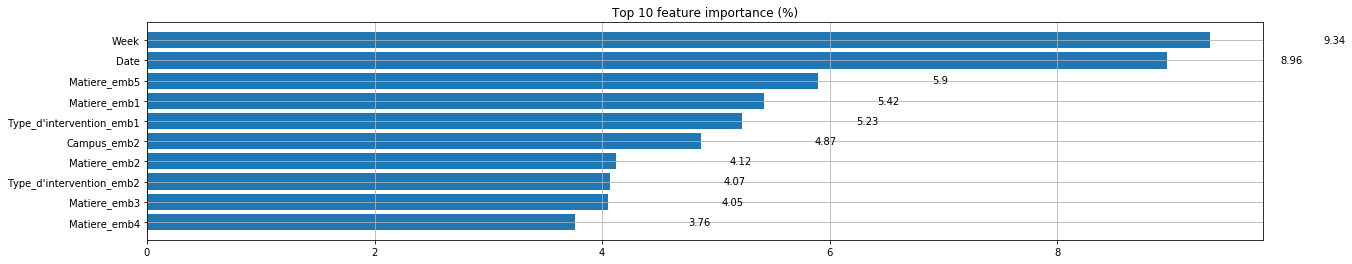


> Feature importances dumped into directory : save


/usr/local/lib/python3.7/dist-packages/mlbox/prediction/predictor.py:405: UserWarning: You have no test dataset. Cannot predict !
  warnings.warn("You have no test dataset. Cannot predict !")


In [ ]:
prd = Predictor()
prd.fit_predict(best, df_1)

+ **Classification**

In [ ]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [ ]:
size = int(0.8*df.shape[0])
train_data = df[:size].to_csv("train_data.csv")
test_data = df[size:].to_csv("test_data.csv")

In [ ]:
train_path = "/content/train_data.csv"
test_path = "/content/test_data.csv"

In [ ]:
paths = [train_path, test_path]
target_name = "Referencie"

In [ ]:
rd = Reader(sep = ',')
data = rd.train_test_split(paths, target_name)


reading csv : train_data.csv ...
cleaning data ...
CPU time: 0.10773205757141113 seconds

reading csv : test_data.csv ...
cleaning data ...
CPU time: 0.07113313674926758 seconds

You have no test dataset !

> Number of common features : 10

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 5
> Number of numerical features: 4
> Number of training samples : 2096
> Number of test samples : 0

> You have no missing values on train set...

> Task : classification
Caplogy       926
Innovation    754
Data          234
Novatiel      182
Name: Referencie, dtype: int64

encoding target ...


In [ ]:
dft = Drift_thresholder()
data = dft.fit_transform(data)


You have no test dataset...


In [ ]:
opt = Optimiser(scoring = 'accuracy', n_folds = 3)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [ ]:
opt.evaluate(None, data)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "


No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : accuracy = 1.0
VARIANCE : 0.0 (fold 1 = 1.0, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 5.2719714641571045 seconds



1.0

In [ ]:
space = {

        'ne__numerical_strategy':{"search":"choice",
                                 "space":[0]},
        'ce__strategy':{"search":"choice",
                        "space":["label_encoding","random_projection", "entity_embedding"]},
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},
        'est__max_depth':{"search":"choice",
                                  "space":[3,4,5,6,7]}

        }

best = opt.optimise(space, data,15)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.10196695144392758}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 0.9985693848354793, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 3.0885350704193115 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.038968953008197645}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 0.9985693848354793, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 2.1572084426879883 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.21196168932922232}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 0.9985693848354793, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 14.035042524337769 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18601659250516153}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 1.0
VARIANCE : 0.0 (fold 1 = 1.0, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 2.242023229598999 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2001743102541357}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 27%|██▋       | 4/15 [00:21<01:01,  5.63s/tria

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 0.9985693848354793, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 3.794175624847412 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.27743502210653387}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 4, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 0.9985693848354793, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 3.2157726287841797 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.1415609699058908}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 4

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 1.0
VARIANCE : 0.0 (fold 1 = 1.0, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 2.172013521194458 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.1992859269114891}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 47%|████▋     | 7/15 [00:30<00:29,  3.67s/trial, 

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 1.0
VARIANCE : 0.0 (fold 1 = 1.0, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 3.6270358562469482 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.037244238406373795}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 4, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 53%|█████▎    | 8/15 [00:34<00:25,  3.67s/tria

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 0.9985693848354793, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 2.735212802886963 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2580542951479689}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 60

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 1.0, fold 2 = 0.9985693848354793, fold 3 = 1.0)
CPU time: 10.108116626739502 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.033723767087908994}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 1.0
VARIANCE : 0.0 (fold 1 = 1.0, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 3.9639570713043213 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.028501346548079357}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 73%|███████▎  | 11/15 [00:51<00:20,  5.07s/tri

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 1.0
VARIANCE : 0.0 (fold 1 = 1.0, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 3.723569393157959 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.1402070640986776}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 80%|████████  | 12/15 [00:55<00:14,  4.67s/tria

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 0.9985693848354793, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 4.182841539382935 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.25417213497328417}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 0.9985693848354793, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 3.5717597007751465 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.28193159974820536}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:232: UserWarning: This is a multiclass problem. Please make sure that your scoring metric is appropriate.
  warnings.warn("This is a multiclass problem. Please make sure that your scoring metric is "



MEAN SCORE : accuracy = 0.9995231282784931
VARIANCE : 0.000674398456067263 (fold 1 = 0.9985693848354793, fold 2 = 1.0, fold 3 = 1.0)
CPU time: 6.2391016483306885 seconds
100%|██████████| 15/15 [01:09<00:00,  4.63s/trial, best loss: -1.0]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'ce__strategy': 'label_encoding', 'est__max_depth': 3, 'fs__threshold': 0.18601659250516153, 'ne__numerical_strategy': 0}



fitting the pipeline ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU time: 0.8230586051940918 seconds


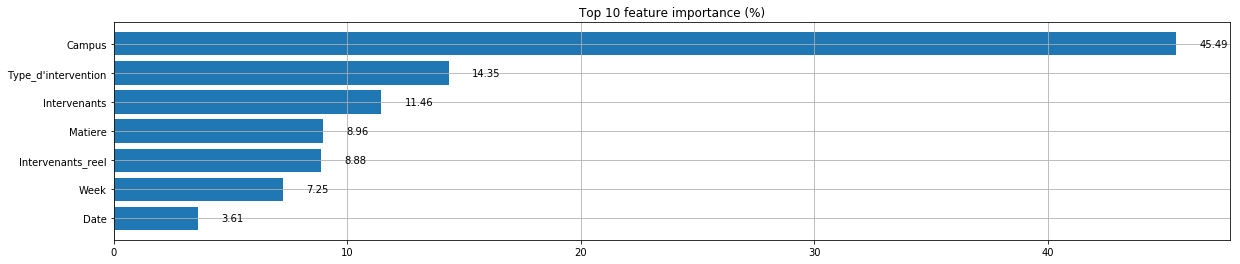


> Feature importances dumped into directory : save


/usr/local/lib/python3.7/dist-packages/mlbox/prediction/predictor.py:405: UserWarning: You have no test dataset. Cannot predict !
  warnings.warn("You have no test dataset. Cannot predict !")


In [ ]:
prd = Predictor()
prd.fit_predict(best, data)

###**Pycaret**

In [ ]:
!pip install --use-deprecated=legacy-resolver pycaret[full]
!pip install markupsafe==2.0.1

In [ ]:
# check pycaret  version
import pycaret
print('pycaret : %s' % pycaret.__version__)

ModuleNotFoundError: ignored

+ **Regression**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import jinja2
from pycaret.regression import *

In [ ]:
size = int(0.9*df.shape[0])
data = df[:size]
data_unseen = df[size:]
target = 'Total hours'

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
regression = setup(data = data, target = 'Total hours')
best_model = compare_models()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
top3 = compare_models(n_select = 3)

###**Convert PDF**

In [ ]:
!apt-get install textlive-xetex texlive-latex-extra-pandoc
!pip install pypandoc
!apt-get install texlive-xetex texlive-fonts-recommanded texlive-generic-recommanded
!jupyter nbconvert --to PDF /content/drive/MyDrive/Colab Notebooks/Automated_EDA_MEMOIRE/dataPandas.ipynb


In [ ]:

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to pdf ML_Automated_Memoire.ipynb

In [ ]:
!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab Notebooks/Automated_EDA_MEMOIRE

In [ ]:
!pandoc /content/Google_Colab_+_Git_Pushing_Changes_to_a_GitHub_Repo!.html -s -o Google_Colab+Git+GitHub.docx